<a href="https://colab.research.google.com/github/IreneJeong/Project-Storage/blob/main/MLS_CW_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:purple; border:0' role="tab" aria-controls="home"><center>GridSearch - CIFAR10</center></h3>

This Notebook is GridSearch for two CNN Models(Simple and Complex model) to do the image classification for CIFAR10 dataset. As the params are only 4 kinds in this notebook due to the the limited time and resources, the accuracy is not that high. But there are still more possibility to improve the performance by adjusting other parameters. <br>
[1. Libraries importing and Random Seed Setting](#1) <br>
[2. Data Loading](#2)<br>
[3. Check Data Distribution](#3)<br>
[4. Data Preprocessing](#4)<br>
[5. Data Visualization](#5)<br>
[6. Pre-defined Functions](#6)<br>
[7. Simple CNN Model](#7)<br>
[8. Complex CNN Model](#8)<br>


<a id="1"></a>
# 1 <h3 style='background:#6A0DAD; border:0; color:white'><center>1. Libraries importing and Random Seed Setting<center><h3>

In [1]:
## importing of service libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.layers import BatchNormalization

import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

## Random Seed 
import random
import tensorflow as tf
import os

def set_seed(seed=42):
    '''
    Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

Libraries imported.


# 2 
<a id="2"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>2. Data Loading<center><h3>

In [2]:
## Data Loading
from tensorflow.keras.datasets import cifar10
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()

print('input_X_train shape: ', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]

print('Image variables initialisation')

N_CLASSES =len(np.unique(output_y_train))
print('Number of Class:', N_CLASSES)

170498071/170498071 [==============================] - 13s 0us/step
input_X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Image variables initialisation
Number of Class: 10


# 3
<a id="3"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>3. Check Data Distribution<center><h3>

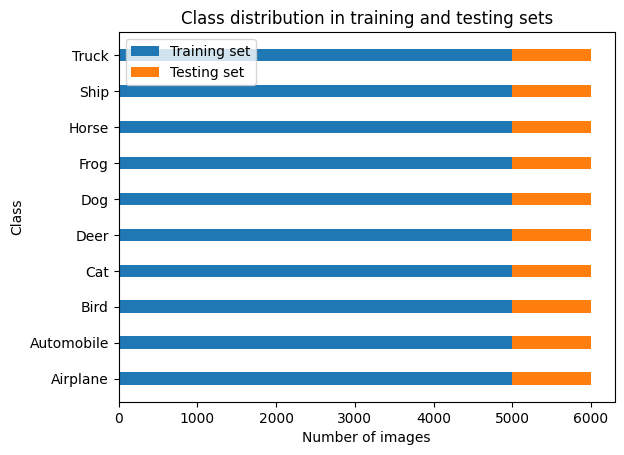

In [3]:
## Distribution of Dataset
# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Count class frequencies in training and testing sets
train_classes, train_counts = np.unique(output_y_train, return_counts=True)
test_classes, test_counts = np.unique(output_y_test, return_counts=True)

# Set bar width
bar_width = 0.35

# Plot grouped bar chart
fig, ax = plt.subplots()
ax.barh(class_names, train_counts, bar_width, label='Training set')
ax.barh(class_names, test_counts, bar_width, left=train_counts, label='Testing set')

# Set axis labels and title
ax.set_xlabel('Number of images')
ax.set_ylabel('Class')
ax.set_title('Class distribution in training and testing sets')

# Add legend and show plot
ax.legend()
plt.show()


# 4 
<a id="4"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>4. Data Preprocessing<center><h3>

In [4]:
## Data Preprocessing 
# output data one-hot encoding 
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)
# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')

input_X_train /=255
input_X_test /=255

# 5
<a id="5"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>5. Data Visualization<center><h3>


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


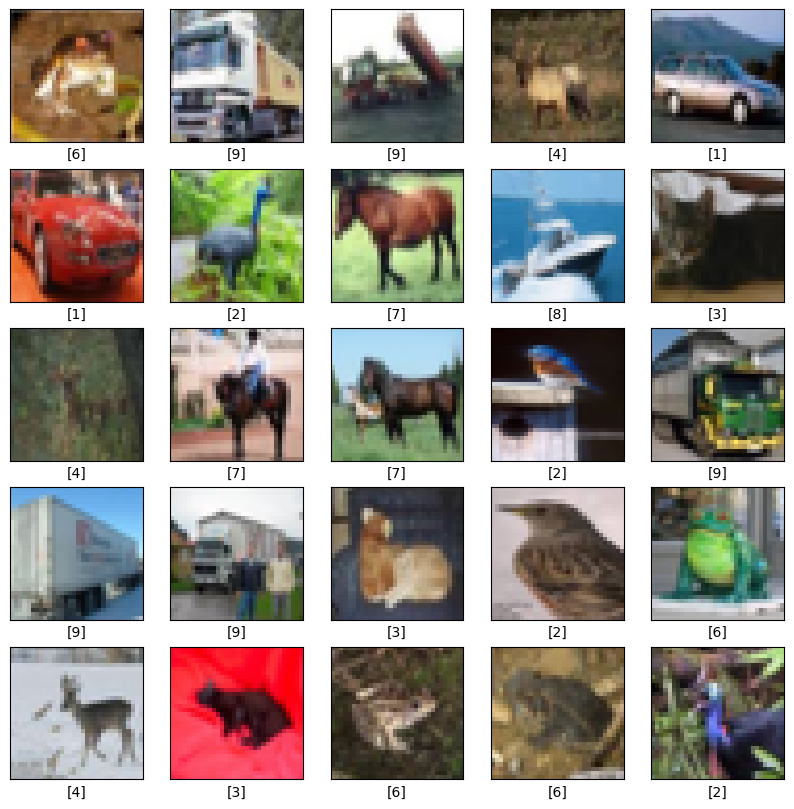

In [5]:
## Data Visualization
plt.figure(figsize=(10,10)) 

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(input_X_train[i], cmap="gray")
  plt.xlabel(np.where(output_y_train[i] == 1)[0])

plt.show()


# 6
<a id="6"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>6. Pre-defined Functions<center><h3>

In [5]:
## Pre-Define functions
#Define the function for plotting the history of the training of the model
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

from tensorflow.keras.callbacks import EarlyStopping

# define early stopping callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', # monitor validation loss
    min_delta=0.001, # minimum change in the monitored quantity to qualify as an improvement
    patience=5, # number of epochs with no improvement after which training will be stopped
    verbose=1 # prints a message when early stopping is triggered
)


# 7
<a id="7"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>7. Simple CNN Model<center><h3>

In [7]:
## Data Loading
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()
IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]
N_CLASSES =len(np.unique(output_y_train))
# output data one-hot encoding 
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)
# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')
input_X_train /=255
input_X_test /=255

In [8]:
# Define the CNN model
def create_model(learning_rate=0.001, epochs = 10, batch_size=32, optimizer= "Adam"):
    #Simple CNN Model 
    model=Sequential()

    # layer 1 
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(N_CLASSES))
    model.add(Activation('softmax'))
    
    if optimizer == "Adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "RMSprop":
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == "sgd":
        opt = SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

print('Simple CNN Network Definition setup')
# Create a KerasClassifier from the create_model function
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = KerasClassifier(build_fn=create_model)

params = {
     'learning_rate': (0.01, 0.001, 0.0001),
     'epochs': (30, 50, 100),
     'batch_size':(32,128,256),
     'optimizer': ["Adam","RMSprop","sgd"]
    }
print('Main variables initialised.')

# Perform Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=keras_model, param_grid=params, cv=3)
grid_result = grid.fit(input_X_train, output_y_train)

# Print the best hyperparameters found using Grid Search
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Save results
import joblib

joblib.dump(grid_result.cv_results_, 'Gird_search_Simple.pkl')
# results = joblib.load('random_search_results.pkl')

Simple CNN Network Definition setup
Main variables initialised.


<ipython-input-8-a07527210235>:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
131/131 [==============================] - 1s 8ms/step - loss: 0.9869 - accuracy: 0.6538
Epoch 14/100
131/131 [==============================] - 1s 8ms/step - loss: 0.9605 - accuracy: 0.6623
Epoch 15/100
131/131 [==============================] - 1s 8ms/step - loss: 0.9190 - accuracy: 0.6733
Epoch 16/100
131/131 [==============================] - 1s 8ms/step - loss: 0.8988 - accuracy: 0.6858
Epoch 17/100
131/131 [==============================] - 1s 8ms/step - loss: 0.8598 - accuracy: 0.6980
Epoch 18/100
131/131 [==============================] - 1s 8ms/step - loss: 0.8373 - accuracy: 0.7057
Epoch 19/100
131/131 [==============================] - 1s 8ms/step - loss: 0.8160 - accuracy: 0.7130
Epoch 20/100
131/131 [==============================] - 1s 8ms/step - loss: 0.7872 - accuracy: 0.7233
Epoch 21/100
131/131 [==============================] - 1s 8ms/step - loss: 0.7620 - accuracy: 0.7338
Epoch 22/100
131/131 [==============================] - 1s 

['Gird_search_Simple.pkl']

In [9]:
best_model = create_model(learning_rate=grid_result.best_params_['learning_rate'],
                          optimizer=grid_result.best_params_['optimizer'])
best_model.summary()

Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_244 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 activation_732 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 max_pooling2d_244 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_488 (Dropout)       (None, 16, 16, 32)        0         
                                                                 
 flatten_244 (Flatten)       (None, 8192)              0         
                                                                 
 dense_488 (Dense)           (None, 512)               4194816   
                                                    

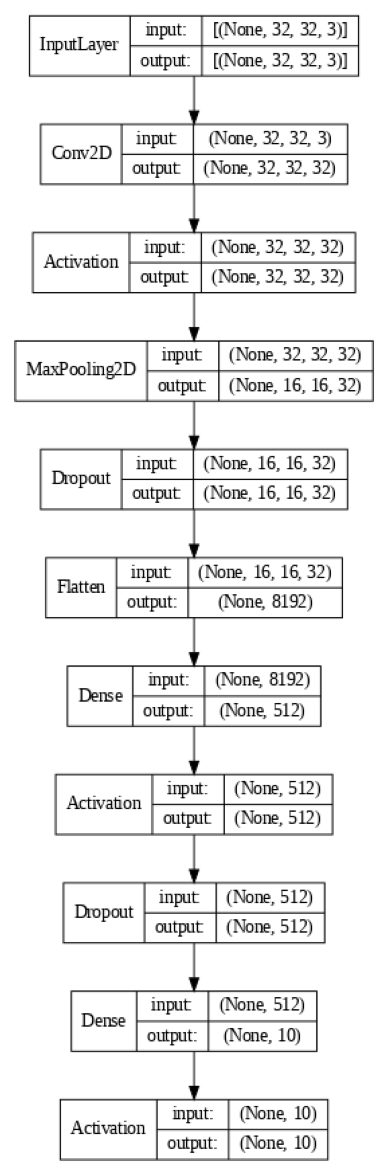

In [11]:
from tensorflow.keras.utils import plot_model
# Plot the model as an image
plot_model(best_model, to_file='model_simple.png', show_shapes=True, show_layer_names=False, dpi=70)

# Display the plot
img = plt.imread('model_simple.png')
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.axis('off')
plt.show()

Epoch 1/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9770 - accuracy: 0.2885 - val_loss: 1.7677 - val_accuracy: 0.3866
Epoch 2/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7171 - accuracy: 0.3885 - val_loss: 1.5722 - val_accuracy: 0.4456
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5618 - accuracy: 0.4425 - val_loss: 1.4584 - val_accuracy: 0.4856
Epoch 4/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.4573 - accuracy: 0.4775 - val_loss: 1.3541 - val_accuracy: 0.5233
Epoch 5/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.3823 - accuracy: 0.5060 - val_loss: 1.3041 - val_accuracy: 0.5435
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3291 - accuracy: 0.5241 - val_loss: 1.2842 - val_accuracy: 0.5530
Epoch 7/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2879 - accuracy: 0.5419 - val_loss: 1.2341 - val_ac

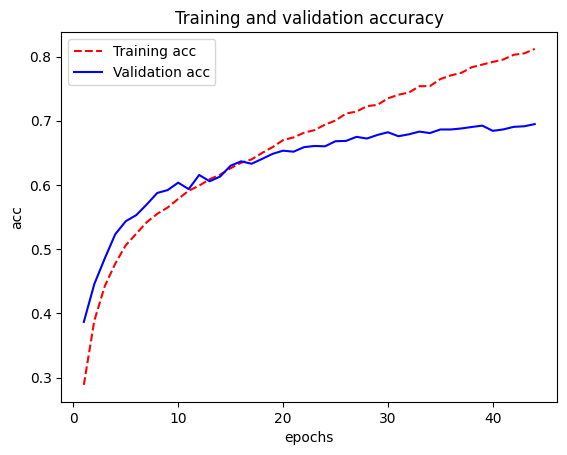

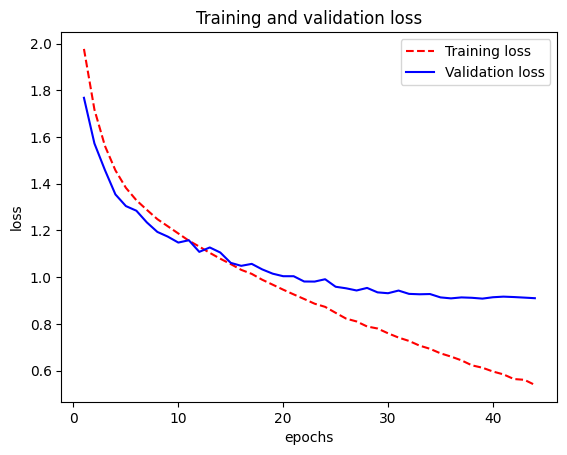

<Figure size 640x480 with 0 Axes>

In [12]:
history = best_model.fit(input_X_train, output_y_train, 
                    batch_size=grid_result.best_params_['batch_size'], epochs=grid_result.best_params_['epochs'], validation_split=0.2, 
                    verbose=1, callbacks=[earlystop_callback])

plot_history(history)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

test_loss,test_acc=best_model.evaluate(input_X_test, output_y_test, verbose=2)

print("test accuracy: ",test_acc)

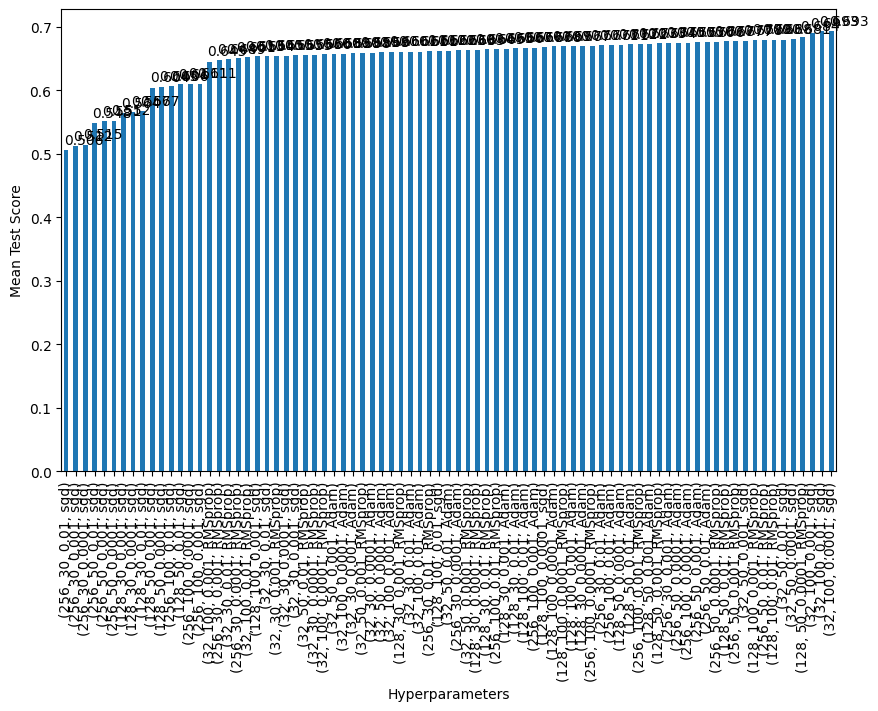

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np

results_df = pd.DataFrame(grid_result.cv_results_)

# extract the columns with the hyperparameters and the test score
param_cols = [col for col in results_df.columns if col.startswith('param_')]
param_cols.append('mean_test_score')

plt.figure(figsize=(10, 6))
results_df1 = pd.DataFrame(grid_result.cv_results_)
ax = results_df1.groupby(param_cols[:-1])['mean_test_score'].mean().sort_values().plot(kind='bar')
ax.set_xlabel('Hyperparameters')
ax.set_ylabel('Mean Test Score')
for i, v in enumerate(results_df1.groupby(param_cols[:-1])['mean_test_score'].mean().sort_values()):
    ax.text(i - 0.25, v + 0.01, str(round(v, 3)), color='black', fontsize=10)
plt.show()


### Data Augementation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator=ImageDataGenerator(rotation_range=30, 
                           width_shift_range=0.2, 
                           height_shift_range=0.2, 
                           zoom_range=0.2, 
                           horizontal_flip=True, 
                           fill_mode='nearest')

train_generator = data_generator.flow(input_X_train, output_y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

# Grid search 
grid_result2 = grid.fit(input_X_train, output_y_train)

# Print the best hyperparameters found using Grid Search
print("Best(Data_Aug): %f using %s" % (grid_result2.best_score_, grid_result.best_params_))

# Save results
import joblib

joblib.dump(grid_result2.cv_results_, 'Gird_search_Simple(Aug).pkl')

best_model = create_model(learning_rate=grid_result2.best_params_['learning_rate'],
                          optimizer=grid_result2.best_params_['optimizer'])
best_model.summary()

In [ ]:
history = best_model.fit(train_generator,
                    batch_size=grid_result2.best_params_['batch_size'], epochs=grid_result2.best_params_['epochs'], validation_data=(input_X_test, output_y_test), 
                    verbose=1, callbacks=[earlystop_callback])

plot_history(history)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

test_loss,test_acc2=best_model.evaluate(input_X_test, output_y_test, verbose=2)
print("test accuracy: ",test_acc2)

# 8 
<a id="7"></a>
<h3 style='background:#6A0DAD; border:0; color:white'><center>8. Complex CNN Model<center><h3>

In [6]:
## Data Loading
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()
IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]
N_CLASSES =len(np.unique(output_y_train))
# output data one-hot encoding 
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)
# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')
input_X_train /=255

In [ ]:
# Define the CNN model
def create_model(learning_rate=0.001, epochs = 10, batch_size=32, optimizer= "Adam"):
    KERNEL_SIZE = (3, 3)
    INPUT_SHAPE = (32, 32, 3)

    model = Sequential()

    # Convolutional Layer
    model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Dropout layers
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    
    if optimizer == "Adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "RMSprop":
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == "sgd":
        opt = SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

print('Simple CNN Network Definition setup')

# Create a KerasClassifier from the create_model function
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = KerasClassifier(build_fn=create_model)

params = {
     'learning_rate': (0.01, 0.001, 0.0001),
     'epochs': (30, 50, 100),
     'batch_size':(32,128,256),
     'optimizer': ["Adam","RMSprop","sgd"]
    }

print('Main variables initialised.')

# Perform Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=keras_model, param_grid=params, cv=3)
grid_result3 = grid.fit(input_X_train, output_y_train)

# Print the best hyperparameters found using Grid Search
print("Best: %f using %s" % (grid_result3.best_score_, grid_result.best_params_))

# Save results
import joblib

joblib.dump(grid_result3.cv_results_, 'Gird_search_Complex.pkl')
# results = joblib.load('random_search_results.pkl')

Simple CNN Network Definition setup
Main variables initialised.


<ipython-input-7-14559c9060e6>:52: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model)


Epoch 1/30
1042/1042 [==============================] - 22s 7ms/step - loss: 1.6291 - accuracy: 0.4175
Epoch 2/30
1042/1042 [==============================] - 7s 7ms/step - loss: 1.2168 - accuracy: 0.5704
Epoch 3/30
1042/1042 [==============================] - 7s 7ms/step - loss: 1.0119 - accuracy: 0.6443
Epoch 4/30
1042/1042 [==============================] - 7s 7ms/step - loss: 0.8977 - accuracy: 0.6902
Epoch 5/30
1042/1042 [==============================] - 7s 7ms/step - loss: 0.8035 - accuracy: 0.7211
Epoch 6/30
1042/1042 [==============================] - 7s 7ms/step - loss: 0.7390 - accuracy: 0.7439
Epoch 7/30
1042/1042 [==============================] - 7s 7ms/step - loss: 0.6862 - accuracy: 0.7652
Epoch 8/30
1042/1042 [==============================] - 7s 7ms/step - loss: 0.6353 - accuracy: 0.7794
Epoch 9/30
1042/1042 [==============================] - 7s 7ms/step - loss: 0.5890 - accuracy: 0.7961
Epoch 10/30
1042/1042 [==============================] - 7s 7ms/step - loss: 0.55

In [ ]:
best_model = create_model(learning_rate=grid_result3.best_params_['learning_rate'],
                          optimizer=grid_result3.best_params_['optimizer'])
best_model.summary()

from tensorflow.keras.utils import plot_model
# Plot the model as an image
plot_model(best_model, to_file='model_complex.png', show_shapes=True, show_layer_names=False, dpi=70)

# Display the plot
img = plt.imread('model_complex.png')
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
history = best_model.fit(input_X_train, output_y_train, 
                    batch_size=grid_result3.best_params_['batch_size'], epochs=grid_result3.best_params_['epochs'], validation_split=0.2, 
                    verbose=1, callbacks=[earlystop_callback])

plot_history(history)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

test_loss,test_acc=best_model.evaluate(input_X_test, output_y_test, verbose=2)

print("test accuracy: ",test_acc)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

results_df = pd.DataFrame(grid_result3.cv_results_)

# extract the columns with the hyperparameters and the test score
param_cols = [col for col in results_df.columns if col.startswith('param_')]
param_cols.append('mean_test_score')

plt.figure(figsize=(10, 6))
results_df1 = pd.DataFrame(grid_result.cv_results_)
ax = results_df1.groupby(param_cols[:-1])['mean_test_score'].mean().sort_values().plot(kind='bar')
ax.set_xlabel('Hyperparameters')
ax.set_ylabel('Mean Test Score')
for i, v in enumerate(results_df1.groupby(param_cols[:-1])['mean_test_score'].mean().sort_values()):
    ax.text(i - 0.25, v + 0.01, str(round(v, 3)), color='black', fontsize=10)
plt.show()


### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator=ImageDataGenerator(rotation_range=30, 
                           width_shift_range=0.2, 
                           height_shift_range=0.2, 
                           zoom_range=0.2, 
                           horizontal_flip=True, 
                           fill_mode='nearest')

train_generator = data_generator.flow(input_X_train, output_y_train, batch_size)
steps_per_epoch = input_X_train.shape[0] // batch_size

# Grid search 
grid_result4 = grid.fit(input_X_train, output_y_train)

# Print the best hyperparameters found using Grid Search
print("Best(Data_Aug): %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))

# Save results
import joblib

joblib.dump(grid_result4.cv_results_, 'Gird_search_Complex(Aug).pkl')

best_model = create_model(learning_rate=grid_result4.best_params_['learning_rate'],
                          optimizer=grid_result4.best_params_['optimizer'])
best_model.summary()

In [ ]:
history = best_model.fit(train_generator,
                    batch_size=grid_result4.best_params_['batch_size'], epochs=grid_result4.best_params_['epochs'], validation_data=(input_X_test, output_y_test), 
                    verbose=1, callbacks=[earlystop_callback])

plot_history(history)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

test_loss,test_acc=best_model.evaluate(input_X_test, output_y_test, verbose=2)

print("test accuracy: ",test_acc)